# Data analysis: Survivors of sinking of the Titanic

Data analysis of survivors of sinking of the Titanic, using data from:

<https://hbiostat.org/data/>

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

## Read data

In [3]:
df = pd.read_csv("titanic.txt")
df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## Analysis

In [4]:
def survivors(df):
    return len(df[df == 1])

def survivors_pct(df):
    return len(df[df == 1]) / len(df)

### Survivors by age

In [5]:
df["age_bucket"] = np.floor(df["age"] / 10.0)
df.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,age_bucket
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,2.0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0.0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,3.0


In [7]:
survivors_by_age = df.groupby("age_bucket")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_age

,survivors_pct,survivors,total
age_bucket,,,
0.0,0.717391,33,46
1.0,0.500000,41,82
2.0,0.360215,67,186
3.0,0.448276,65,145
4.0,0.431579,41,95
5.0,0.490566,26,53
6.0,0.363636,8,22
7.0,0.000000,0,4


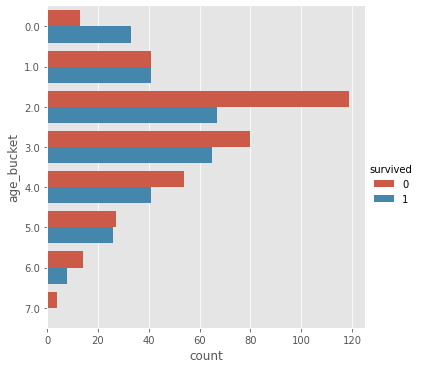

In [12]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

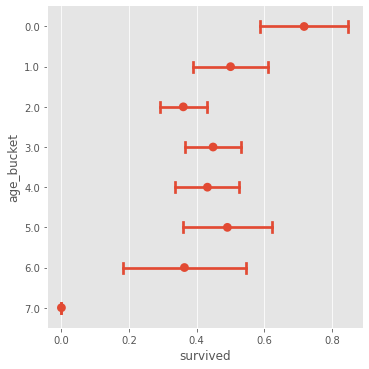

In [14]:
sns.catplot(data=df, y="age_bucket", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class

In [9]:
survivors_by_class = df.groupby("pclass")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class

,survivors_pct,survivors,total
pclass,,,
1st,0.599379,193,322
2nd,0.425000,119,280
3rd,0.192686,137,711


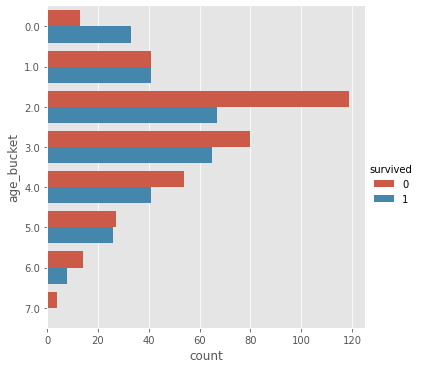

In [15]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

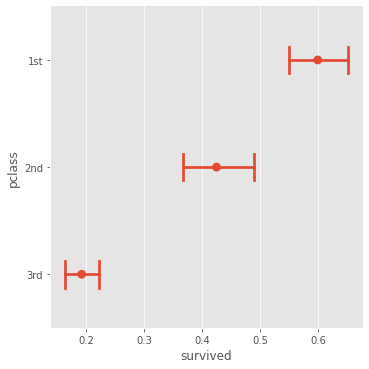

In [16]:
sns.catplot(data=df, y="pclass", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class and age

In [11]:
survivors_by_class_and_age = df.groupby(["pclass", "age_bucket"])["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class_and_age

survivors_pct  survivors  total
pclass age_bucket                                 
1st    0.0              0.750000          3      4
       1.0              0.888889         16     18
       2.0              0.731707         30     41
       3.0              0.620000         31     50
       4.0              0.568627         29     51
       5.0              0.564103         22     39
       6.0              0.400000          8     20
       7.0              0.000000          0      3
2nd    0.0              1.000000         20     20
       1.0              0.521739         12     23
       2.0              0.364865         27     74
       3.0              0.410714         23     56
       4.0              0.416667         10     24
       5.0              0.307692          4     13
       6.0              0.000000          0      1
       7.0              0.000000          0      1
3rd    0.0              0.454545         10     22
       1.0              0.317073         13     41
       2.0              0.140845         10     71
       3.0              0.282051         11     39
       4.0              0.100000          2     20
       5.0              0.000000          0      1
       6.0              0.000000          0      1

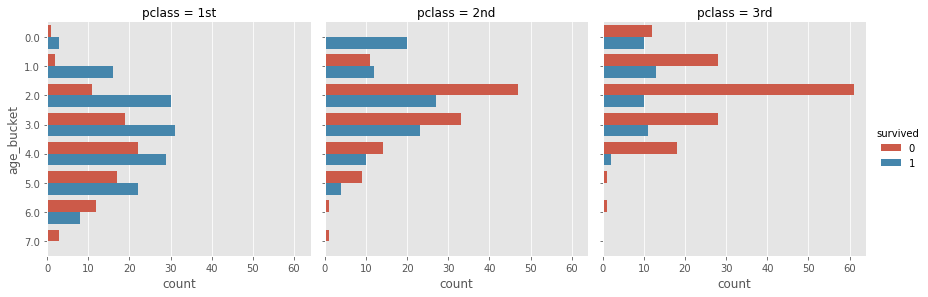

In [29]:
sns.catplot(data=df, y="age_bucket", hue="survived", col="pclass", kind="count", height=4)

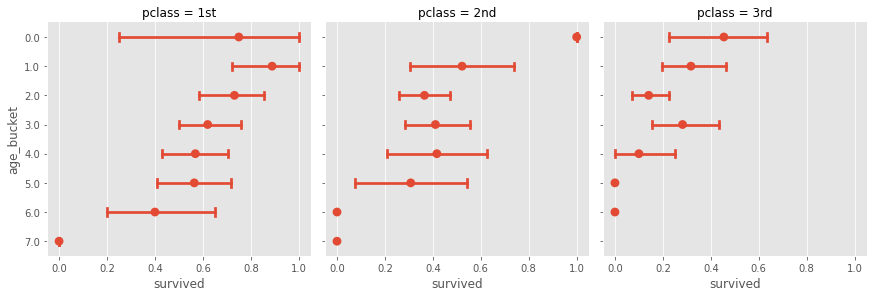

In [30]:
sns.catplot(data=df, y="age_bucket", x="survived", col="pclass", kind="point", join=False, orient="h", capsize=0.25, height=4)